In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
img = cv2.imread('bookpage.jpg')

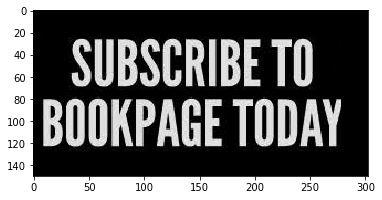

In [29]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
plt.imshow(gray, cmap = 'gray')

In [30]:
# blur = cv2.GaussianBlur(img, (11, 11), 25)

In [31]:
# cv2.imshow('e', blur)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [32]:
# image = cv2.addWeighted(img, 1.5, blur, -0.5, 0, img)
# cv2.imshow('x', image)
# cv2.imshow('y', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [33]:
# blur = cv2.medianBlur(gray, 3)
# plt.imshow(blur, cmap = 'gray')

In [34]:
#tesseract API

In [35]:
# import pytesseract
# from PIL import Image

In [36]:
# img = cv2.imread('bookpage.jpg')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imwrite('preprobook.jpg', gray)

In [37]:
# text = pytesseract.image_to_string(Image.open("preprobook.jpg"))

In [38]:
# ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)

In [39]:
th = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

In [40]:
# denoise 
# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,  3))
# dilated = cv2.dilate(th, kernel, iterations=9)  

In [41]:
_,contours1 , hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
len(contours1)

24

In [42]:
_,contours2 , hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
len(contours2)

31

In [43]:
# for contour in contours1:
    
#     [x, y, w, h] = cv2.boundingRect(contour)
# #     print(x, y, w, h)
#     if h > 300 and w > 300:
#         continue
    
#     if h < 40 and w < 35:
#         continue
        
#     cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)
    
for contour in contours2:
#     print(x, y, w, h)
    [x, y, w, h] = cv2.boundingRect(contour)
    
    if h > 300 and w > 300:
        continue
    
    if h < 40 and w < 35:
        continue
        
    cv2.rectangle(img, (x, y), (x+w, y+h), (0,0,255), 2)

In [44]:
# cv2.imshow('captcha_result', img)
# cv2.imshow('captcha_relt', th)

# cv2.waitKey()
# cv2.destroyAllWindows()

In [45]:
# cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [46]:
# contours1[0]

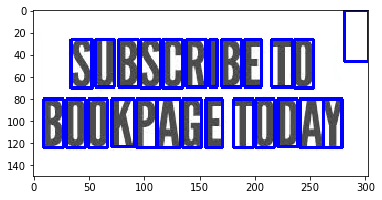

In [47]:
plt.imshow(img)

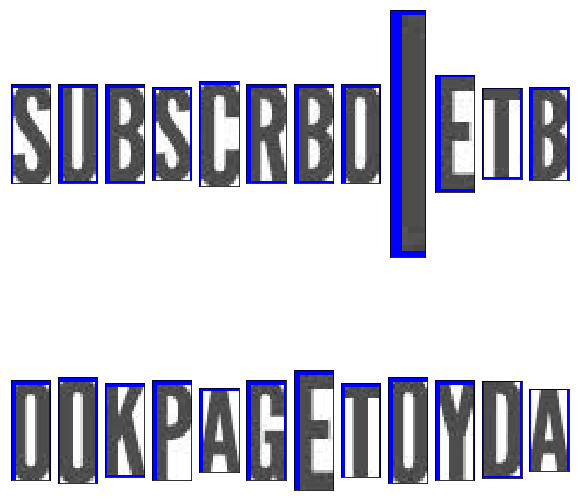

In [48]:
fig, axes = plt.subplots(2, 12, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    c = contours1[23-i]
    [x, y, w, h] = cv2.boundingRect(c)
    ax.imshow(img[y:y+h, x:x+w, :])
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
# c = contours1[0]
# [x, y, w, h] = cv2.boundingRect(c)
# print(x, y, w, h)
# plt.imshow(img[y:y+h, x:x+w, :])

In [ ]:
cv2.imshow('im',img[x:x+w, y:y+h, :])
cv2.imshow('captcha_relt', th)
cv2.waitKey(0)
cv2.destroyAllWindows()